範例

In [1]:
# import xlwings as xw

# work = xw.Book()

In [2]:
# sheet = work.sheets["sheet1"]
# sheet.cells(1,1).value = "Hello world !"

實例

In [3]:
import xlwings as xw
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame({'Type of Medication error': [3, 83, 16, 53, 59, 7, 27, 9, 76, 4, 92, 1]})
df.index = ['Technique error', 'Wrong time', 'Wrong calculation', 'Wrong patient', 'Over dose',
            'Under dose', 'Wrong route', 'Duplicated drugs',
            'Wrong drug', 'Wrong IV rate', 'Dose missed', 'Unauthorised drug']

In [5]:
# df
# df.to_csv("simulation_data.csv")

In [7]:
work = xw.Book(r"D:\Desktop\新增資料夾\simulation_data.xlsm")#excel的位置
sheet = work.sheets[0]
df = sheet.used_range.options(pd.DataFrame, header=1, index=False).value

In [8]:
df.columns.values[0] = 'Index'


df = df.sort_values(by='Type of Medication error', ascending=False)
df['Percent of Errors'] = df['Type of Medication error'] / df['Type of Medication error'].sum() * 100
df['Cumulative Percent'] = df['Percent of Errors'].cumsum()


df = df.reset_index(drop=True)

In [9]:
#df.head()

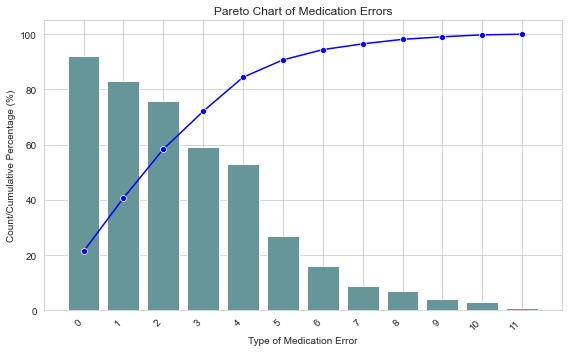

In [10]:
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(8, 5))
sns.barplot(x=df.index, y='Type of Medication error', color='cadetblue', data=df) #cadetblue
sns.lineplot(x=df.index, y='Cumulative Percent', color='blue', data=df, marker='o', linestyle='--', style=None)
plt.xlabel('Type of Medication Error')
plt.ylabel('Count/Cumulative Percentage (%)')
plt.title('Pareto Chart of Medication Errors')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()


image_path = r"D:\Desktop\新增資料夾\pareto_chart.png"
plt.savefig(image_path)


sheet.pictures.add(image_path, name="ParetoChart", update=True, left=sheet.range("A10").left, top=sheet.range("A10").top)


plt.show()
